In [29]:
# 繪圖設定字體顏色(否則黑色會看不到)
import matplotlib as mpl
COLOR1 = 'red'
COLOR2 = 'blue'
mpl.rcParams['text.color'] = COLOR1
mpl.rcParams['axes.labelcolor'] = COLOR2
mpl.rcParams['xtick.color'] = COLOR2
mpl.rcParams['ytick.color'] = COLOR2

# 影像擷取：使用視訊擷取最佳鏡頭
    # 打開視訊自拍，看到滿意的畫面，按s 鍵存檔，按q 鍵結束

In [2]:
import time
import numpy as np
import cv2

cap = cv2.VideoCapture(0)
count = 0
# 60秒內有效
start_time = time.time()
while ( int(time.time() - start_time) < 60 ):
    if cap.isOpened() == True:
        retval, image = cap.read()
        cv2.imshow('frame '+str(count), image)
        key = cv2.waitKey(delay=30)
        # 存檔
        if key == ord("s"):
            print('save file: '+str(count)+'.png')
            cv2.imwrite('./data/2/catch/'+str(count)+'.png', image)
            count += 1
        # 按q退出
        if key == ord("q"):
            print('farewell!')
            break
cap.release()
cv2.destroyAllWindows()

save file: 0.png
save file: 1.png
save file: 2.png
farewell!


Loading images...
['0.png', '1.png', '2.png']


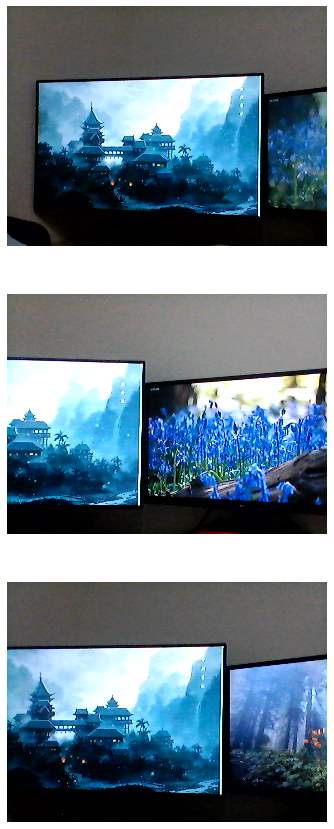

In [49]:
# 顯示抓取的圖檔
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import data, color, io
from skimage.transform import rescale, resize

# 讀取資料夾內所有檔案(含次目錄)
IMAGE_DIRECTORY = './data/2/catch'
# 讀取圖檔
def ReadImageFile(filename):
    image = io.imread(filename)
    return image
# 載入資料
def load_data():
    print("Loading images...")
    X = []     # 存放 每個圖檔矩陣
    y = []     # 存放 檔名
    for dirpath, dirnames, filenames in os.walk(IMAGE_DIRECTORY):
        for filename in [f for f in filenames if f.endswith(".png")]:
            y.append(filename)
            X.append(ReadImageFile(dirpath + '/' + filename))
    return X, y
# 顯示圖檔
def show_pic():
    X, y = load_data()
    print(y)
    count = len(y)
    for i in range(count):
        plt.subplot(count, 1, i+1)
        plt.axis('off')
        plt.imshow(X[i])
plt.figure(figsize=(15, 15))
show_pic()

# 影像擷取 + 合成：使用YouTube影片擷取最佳畫面
* 1.抓取yt影片
    * 安裝：pip install pytube3
* 2.影片擷取最佳畫面
* 3.照片加花邊

### 1.抓取yt影片

In [17]:
from pytube import YouTube
# 定義進度條
def progress(stream, chunk, bytes_remaining):
    # 影片總大小
    contentSize = video.filesize
    # 已經下載大小
    size = contentSize - bytes_remaining
    # 總共20格
    print('\r' + '[Download progress]:[%s%s]%.2f%%;' % 
          ( '█' * int(size*20/contentSize), ' ' * (20-int(size*20/contentSize)), float(size/contentSize*100) ), 
          end='')

url = 'https://www.youtube.com/watch?v=HQDDlgGy2hg'
yt = YouTube(url, on_progress_callback=progress)
print('影片名稱 =', yt.title)
video = yt.streams.first()
video.download('./data/3')

# 重新命名
import os
path = './data/3/'
fname = yt.title + '.mp4'
new_fname = 'demo.mp4'
os.rename(os.path.join(path, fname), os.path.join(path, new_fname))

影片名稱 = 高爾宣 OSN -【Without You】沒了妳｜Official MV
[Download progress]:[████████████████████]100.00%;

### 2.影片擷取最佳畫面

In [4]:
import numpy as np
import cv2

cap = cv2.VideoCapture('./data/3/demo.mp4')
num_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
count = 0
while cap.isOpened():
    retval, image = cap.read()
    cv2.imshow('frame '+str(count), image)
    key = cv2.waitKey(delay=30)
    # 存檔
    if key == ord("s"):
        print('save file: '+str(count)+'.png')
        cv2.imwrite('./data/3/catch/'+str(count)+'.png', image)
        count += 1
    # 按q退出
    if key == ord("q"):
        print('farewell!')
        break
    # 影片播完退出
    FRAME_NOW = cap.get(cv2.CAP_PROP_POS_FRAMES)
    if FRAME_NOW >= num_frames:
        print('movie is over!')
        break
cap.release()
cv2.destroyAllWindows()

save file: 0.png
save file: 1.png
save file: 2.png
farewell!


Loading images...
['0.png', '1.png', '2.png']


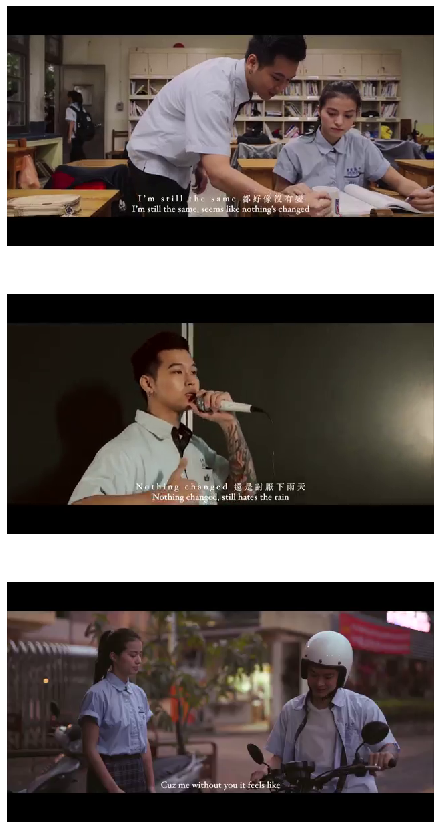

In [48]:
# 顯示抓取的圖檔
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import data, color, io
from skimage.transform import rescale, resize

# 讀取資料夾內所有檔案(含次目錄)
IMAGE_DIRECTORY = './data/3/catch'
# 讀取圖檔
def ReadImageFile(filename):
    image = io.imread(filename)
    return image
# 載入資料
def load_data():
    print("Loading images...")
    X = []     # 存放 每個圖檔矩陣
    y = []     # 存放 檔名
    for dirpath, dirnames, filenames in os.walk(IMAGE_DIRECTORY):
        for filename in [f for f in filenames if f.endswith(".png")]:
            y.append(filename)
            X.append(ReadImageFile(dirpath + '/' + filename))
    return X, y
# 顯示圖檔
def show_pic():
    X, y = load_data()
    print(y)
    count = len(y)
    for i in range(count):
        plt.subplot(count, 1, i+1)
        plt.axis('off')
        plt.imshow(X[i])
plt.figure(figsize=(15, 15))
show_pic()

### 3.照片加花邊

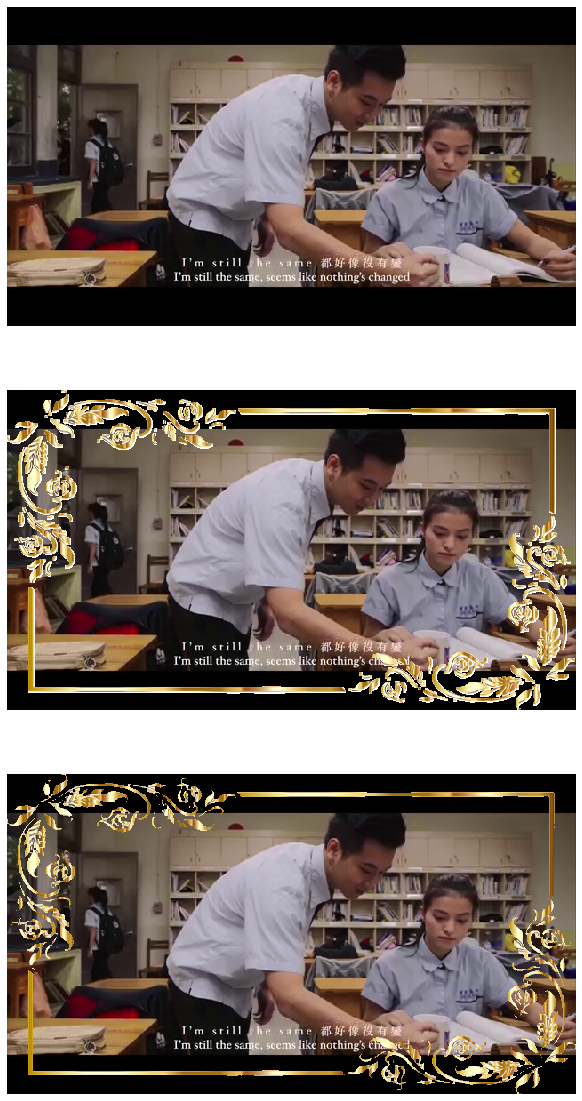

In [47]:
# 單一圖片加花邊示範
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import data, color, io
from skimage.transform import rescale, resize
# np.set_printoptions(threshold=np.inf)
# 花邊
image = io.imread('./data/3/back2.png')
# 原圖
img = io.imread('./data/3/catch/0.png')

# 轉灰階
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# 二值化
ret, binary = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY)

# 開運算(Opening)去白躁
k = np.ones((4, 4), np.uint8)
# k = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4, 4))
r1 = cv2.morphologyEx(255-binary, cv2.MORPH_OPEN, k)
# 白色(255)即花邊，r1 shape=(360, 640)
img_trans = img.copy()
for i in range(r1.shape[0]):
    for j in range(r1.shape[1]):
        if r1[i, j] != 0:
            img_trans[i, j, 0] = image[i][j][0]
            img_trans[i, j, 1] = image[i][j][1]
            img_trans[i, j, 2] = image[i][j][2]

# 純腐蝕 → 效果較好！
k2 = np.ones((3, 3), np.uint8)
r2 = cv2.erode(255-binary, k2, iterations=1)
# 白色(255)即花邊
img_trans2 = img.copy()
for i in range(r2.shape[0]):
    for j in range(r2.shape[1]):
        if r2[i, j] != 0:
            img_trans2[i, j, 0] = image[i][j][0]
            img_trans2[i, j, 1] = image[i][j][1]
            img_trans2[i, j, 2] = image[i][j][2]
            
plt.figure(figsize=(20, 20))
plt.subplot(311)
plt.axis('off')
plt.imshow(img)
plt.subplot(312)
plt.axis('off')
plt.imshow(img_trans)
plt.subplot(313)
plt.axis('off')
plt.imshow(img_trans2)
            
# img_BGR = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
# img_trans_BGR = cv2.cvtColor(img_trans, cv2.COLOR_RGB2BGR)
# img_trans2_BGR = cv2.cvtColor(img_trans2, cv2.COLOR_RGB2BGR)
# cv2.imshow("img_BGR", img_BGR)
# cv2.imshow("img_trans_BGR", img_trans_BGR)
# cv2.imshow("img_trans2_BGR", img_trans2_BGR)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

Loading images...


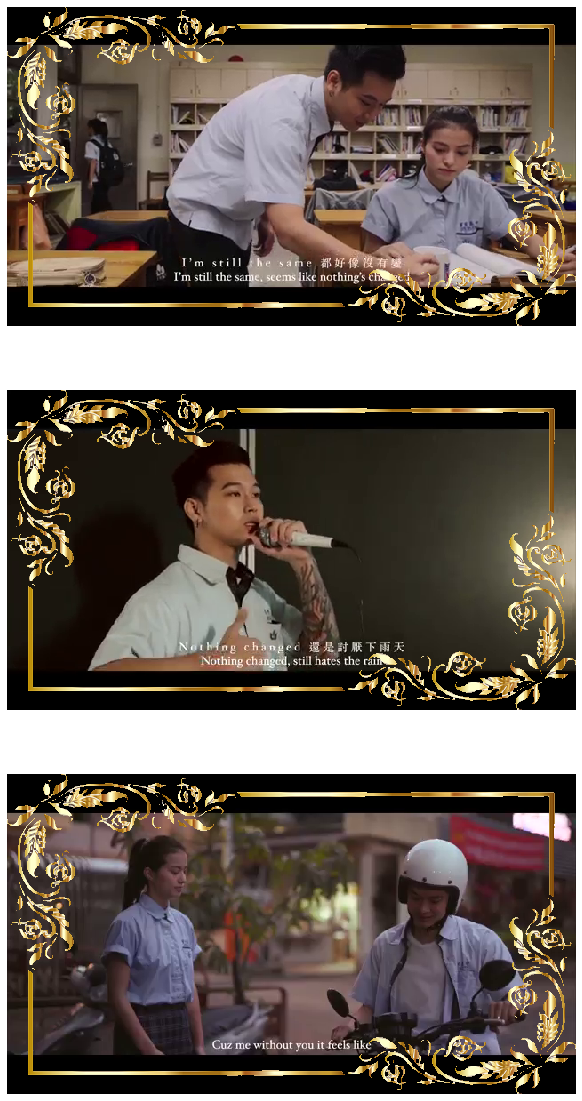

In [57]:
# 所有圖片加花邊
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import data, color, io
from skimage.transform import rescale, resize

# 讀取資料夾內所有檔案(含次目錄)
IMAGE_DIRECTORY = './data/3/catch'
# 讀取圖檔
def ReadImageFile(filename):
    image = io.imread(filename)
    return image
# 載入資料
def load_data():
    print("Loading images...")
    X = []     # 存放 每個圖檔矩陣
    y = []     # 存放 檔名
    for dirpath, dirnames, filenames in os.walk(IMAGE_DIRECTORY):
        for filename in [f for f in filenames if f.endswith(".png")]:
            y.append(filename)
            X.append(ReadImageFile(dirpath + '/' + filename))
    return X, y

# 傳入花邊檔，處理花邊
def frame_process(image):
    # 轉灰階
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # 二值化
    ret, binary = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY)
    # 純腐蝕 → 效果較好！
    k2 = np.ones((3, 3), np.uint8)
    r2 = cv2.erode(255-binary, k2, iterations=1)
    return r2

# 傳入花邊檔，所有圖片加上花邊
def add_frame(image):
    # 花邊處理
    r2 = frame_process(image)
    
    # 獲取原圖
    X, y = load_data()
    
    # 存加上花邊的原圖
    X_add_frame = []
    # 加上花邊
    count = len(y)
    for i in range(count):
        # 原圖
        img = X[i]
        # 白色(255)即花邊
        img_trans2 = img.copy()
        for i in range(r2.shape[0]):
            for j in range(r2.shape[1]):
                if r2[i, j] != 0:
                    img_trans2[i, j, 0] = image[i][j][0]
                    img_trans2[i, j, 1] = image[i][j][1]
                    img_trans2[i, j, 2] = image[i][j][2]
        X_add_frame.append(img_trans2)
    return X_add_frame

# 傳入花邊檔，顯示花邊圖
def show_add_frame(image):
    plt.figure(figsize=(20, 20))
    X_add_frame = add_frame(image)
    count = len(X_add_frame)
    for i in range(count):
        plt.subplot(count, 1, i+1)
        plt.axis('off')
        plt.imshow(X_add_frame[i])

# Main
image = io.imread('./data/3/back2.png')
show_add_frame(image)